## Final Project Submission

Please fill out:
* Student name: Andi Osika
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Project Description:

The dataset for this project was provided to us: "kc_house_data.csv", to explore and model with multivariate linear regression to predict the sale price of houses as accurately as possible. 



# Obtain: Import Tools /  Data

This particular dataset was provided for this project and included

In [1]:
##import necessary tools and data

!pip install -U fsds_100719
from fsds_100719.imports import *
##Loads 
#Handle	Package	Description
#dp	IPython.display	Display modules with helpful display and clearing commands.
#fs	fsds_100719	Custom data science bootcamp student package
#mpl	matplotlib	Matplotlib's base OOP module with formatting artists
#plt	matplotlib.pyplot	Matplotlib's matlab-like plotting module
#np	numpy	scientific computing with Python
#pd	pandas	High performance data structures and tools
#sns	seaborn	High-level data visualization library based on matplotlib

kc = pd.read_csv("kc_house_data.csv")


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [ ]:
import scipy.stats as stats


In [2]:
pd.set_option('display.max_columns',0)

# Examine the Data

In [3]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Notes:
Upon initial inspection, one can determine this dataset contains 21 columns containing various types of values in each ranging from objects, to numeric both as integers and floats.  Some columns that are labeled year are carrying values as float and integers and will need to be converted. Out of the 21,597 rows of data, there are a three missing values including:
-waterfront
-view
-yr_renovated

The next step would be to further inspect the values in each column to validate assumptions and determine what the corresponding values indicate or measure.

By doing a quick search on the zip codes and title of the file one can determine that this is a dataset for real estate information in King County, Washington.  This county includes Washington state's largest cities including Seattle, Kirkland, Renton, Bellevue as well as some small and remote areas including islands and those in mountain ranges.

Also looked here for some initial background: https://www.kingcounty.gov/depts/assessor.aspx

In [5]:
# Further inspecting the data:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Looked at variables to gain insight to their meaning:  https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r


Some variables weren't searchable  (go back and cross reference put an ** next to assumed

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

  X waterfront - A binary variable that seems to be proven not applicable only .06% of this was marked as a true value

view - An index assigned on a scale from 0 to 4 of how good the view of the property

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

   X yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [6]:
## initial thoughts... is lat/long redundant for location with zip code?
### age vs reno? how would I deal with that?

## Function to help investigate specific columns

In [90]:
def check_column(df, col_name, n_unique=10):
    """Displays info on null values, datatype, unqiue values
    and displays .describe()
    
    Args:
        df (df): contains the columns
        col_name (str): name of the df column to show
        n_unique (int): Number of unique values top show.
    
    Return:
        fig, ax (Matplotlib Figure and Axes)
    """
    
    print('DataType:')
    print('\t',df[col_name].dtypes)
    
    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    display(df[col_name].describe().round(3))
    
    print('\nValue Counts:')
    display(df[col_name].value_counts(n_unique)) 
    
 
    
    ## Add some EDA figures
    fig, ax = plt.subplots(ncols=2);
    
    df[col_name].hist(ax=ax[0])
    ax[1].scatter(df[col_name], kc_filtered['price'])
    
    return fig,ax

#check_column(df,'condition')

In [8]:
#filtering four outliers code:
#z_score = np.abs(stats.zscore(kc['colname'])

#above_three = []

#for index, value in enjumerate(z_score):
                 #if value > 3:
                 #above_three.append(index)
                 
                 

# SCRUB: Initial Data Cleaning

In [9]:
display(kc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

In [10]:
## Initial changes to convert objects into useable data:

# 1) date from object to date time:
kc['date'] = pd.to_datetime(kc['date'])

# 2) date from int to date time:

kc['yr_built'] = pd.to_datetime(kc['yr_built'], format=('%Y'))

# 3) change sqft_basement to into numeric value
kc['sqft_basement'] = pd.to_numeric(kc['sqft_basement'],errors='coerce')


### Addressing renovations by adding a cloumn: last_upgrade to illustrate when a home had been most recently upgraded to address the idea that not all homes are renovated.

In [11]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955-01-01,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951-01-01,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933-01-01,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965-01-01,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987-01-01,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
kc['yr_renovated'].fillna(0, inplace=True)

In [14]:
import math
kc['yr_reno'] = kc['yr_renovated'].apply(lambda x:math.trunc(x))

In [14]:
kc['yr_reno'].value_counts()

0       20853
2014       73
2003       31
2013       31
2007       30
        ...  
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_reno, Length: 70, dtype: int64

In [15]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955-01-01,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951-01-01,1991.0,98125,47.7210,-122.319,1690,7639,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933-01-01,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965-01-01,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987-01-01,0.0,98074,47.6168,-122.045,1800,7503,0


In [16]:
kc['yr_built'] = kc['yr_built'].apply(lambda x: x.year)

In [17]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [18]:
kc['last_upgrade'] = np.where(kc['yr_reno']==0, kc['yr_built'], kc['yr_reno'])

In [18]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [19]:
kc['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [20]:
kc.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819,0
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0


In [21]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
yr_reno          21597 non-null int64
dtypes: datetime64[ns](1), f

In [22]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


## Looking for duplicates:

In [23]:
duplicates = kc[kc.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno


## Dealing with Null Values

In [25]:
## Looking for null values:
nulls = kc.isnull().sum()
print(nulls[nulls > 0])

waterfront       2376
view               63
sqft_basement     454
dtype: int64


In [26]:
#Examining missing data in terms of percentages
kc.isnull().sum() / len(kc.index)

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.021021
yr_built         0.000000
yr_renovated     0.000000
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
yr_reno          0.000000
last_upgrade     0.000000
dtype: float64

### Dropping the null values 'view' and 'sft_basement' since they are insignificant @.02%, and 2% respectively is appropriate and preserves a good majority of overall data.

In [27]:
#it wold be acceptable to drop values for view and sft_basement since they are insignificant @.02%, and 2% respectively
kc.dropna(subset= ['view'], inplace=True)
kc.dropna(subset=['sqft_basement'], inplace=True)

In [28]:
##curious about yr_renovated... not all homes were/are renovated exploring:
kc['yr_renovated'].describe()

count    21082.000000
mean        68.359359
std        363.029573
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [29]:
kc.drop('yr_renovated', axis=1, inplace=True)

### Dropping the variable "waterfront" based on the fact that only .06% of this data was populated with a binary value of 1 for this field.  Considering that King County sits on many bodies of water, including Puget Sound, 33 lakes and multiple rivers https://en.wikipedia.org/wiki/Category:Lakes_of_King_County,_Washington 


In [30]:
##next missing value set: watherfront
kc['waterfront'].describe()

count    18749.000000
mean         0.007520
std          0.086396
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [31]:
##'waterfront' appears to be a binary value, so it wouldn't make sense to fill value with mean.It might make sense 
#to populate with zeros since if a property was 'waterfront', it would be marked as such.
#since it tends to be more than 10% of the data, exploring further to see if there are any contextual clues that
#may indicate 'waterfront'

In [32]:
kc['waterfront'].value_counts() / len(kc.index)

0.0    0.882649
1.0    0.006688
Name: waterfront, dtype: float64

In [112]:
#dropping the waterfront column
kc.drop('waterfront', axis=1, inplace=True)

In [34]:
##all null values are clear
kc.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
yr_reno          0
last_upgrade     0
dtype: int64

# Explore: Further Data Inspection

In [35]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno,last_upgrade
count,2.108200e+04,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.233327,3.409828,7.657717,1789.000000,291.359975,1971.023337,98077.858837,47.560371,-122.213843,1986.917418,12732.514135,68.359359,1972.950005
std,2.876423e+09,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.765066,0.650597,1.173690,828.369355,442.007858,29.323120,53.528769,0.138568,0.140607,685.544250,27148.781580,363.029573,28.905522
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1900.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000,0.000000,1954.000000
50%,3.904970e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000,0.000000,1977.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000,0.000000,1999.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,2015.000000


## Visual Inspections to identify data types:
    Evaluating data to determine if it is numeric or categorical in nature

### Initial Histograms: 

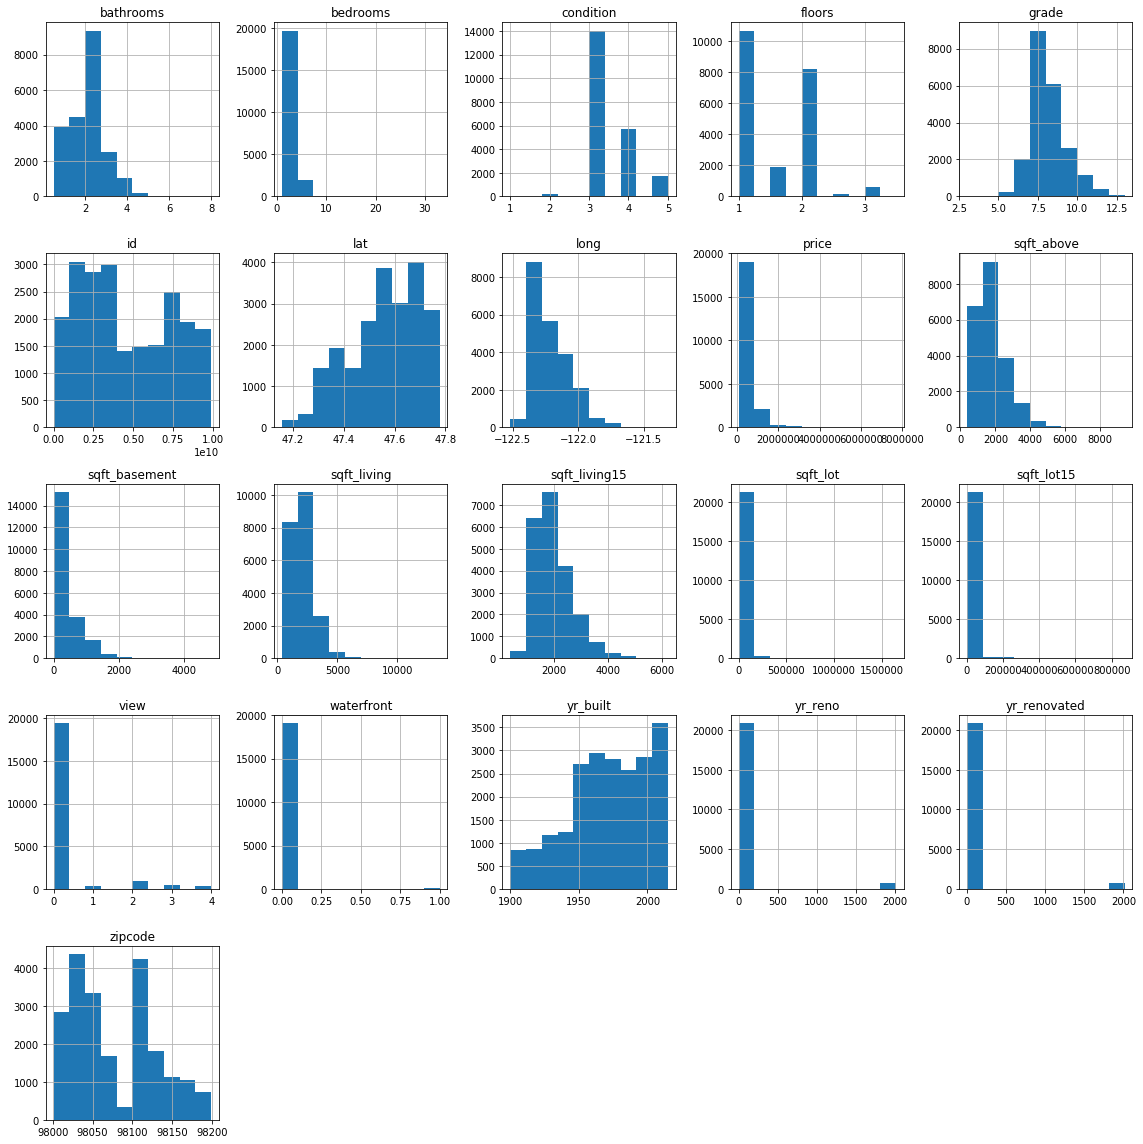

In [25]:
kc.hist(figsize=(16,16));
plt.tight_layout()

### Initial Scatter Matrix

In [37]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,16)

In [38]:
#pd.plotting.scatter_matrix(kc);

In looking at data, **decide to drop ID** - this is a unique identifier that is assigned after a home is listed and who's purpose is to track the individual record rather than to quantify attributes of a property.


### Also in viewing the scatter plot several categories demonstrate categorical patterns.


In [39]:
#dropping the waterfront column
kc.drop('id', axis=1, inplace=True)

## Inspecting columns that could be categorical data :
    - floors -assigned category code
    - view - assigned category code
    - condition - assigned category code
    - grade - assigned category code
    - zipcode - assigned a category code after evaluation.
    
    ...and cleaning and looking for initial correlation


In [26]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


### Floors 

no obvious  clear correlation upon initial inspection

In [27]:
kc['floors'].describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [42]:
cat_floors = kc['floors'].astype('category')
coded_floors = cat_floors.cat.codes
kc['floors'] = coded_floors

DataType:
	 float64
Null Values Present = 0


count    21597.000
mean         1.494
std          0.540
min          1.000
25%          1.000
50%          1.500
75%          2.000
max          3.500
Name: floors, dtype: float64


Value Counts:


1.0    0.494189
2.0    0.381303
1.5    0.088438
3.0    0.028291
2.5    0.007455
3.5    0.000324
Name: floors, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD977E2908>,
       dtype=object))

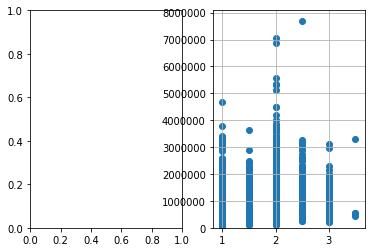

In [29]:
check_column(kc, 'floors')

see no real correlation between price and floors

### View

no clear correlation upon inital inspection

In [43]:
kc['view'].describe()

count    21082.000000
mean         0.233327
std          0.765066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [44]:
kc['view'].value_counts()

0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [45]:
cat_view = kc['view'].astype('category')
coded_view = cat_view.cat.codes
kc['view'] = coded_view

DataType:
	 float64
Null Values Present = 63


count    21534.000
mean         0.234
std          0.766
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          4.000
Name: view, dtype: float64


Value Counts:


0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD9934A390>,
       dtype=object))

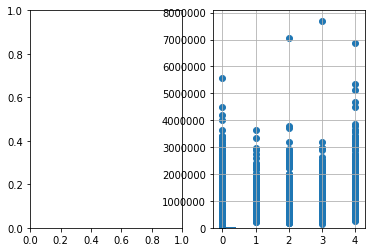

In [30]:
check_column(kc, 'view')

no clear correlation between price and view - would be ok dropping this .. 

### Condition price increases with a value of '3'
 Notes: Categorical values scale 1-5 ; mean is 3.4 std .65 13K of 21K are 3's

In [47]:
kc['condition'].describe()

count    21082.000000
mean         3.409828
std          0.650597
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [48]:
kc['condition'].value_counts()

3    13688
4     5538
5     1662
2      166
1       28
Name: condition, dtype: int64

In [49]:
cat_condition = kc['condition'].astype('category')
coded_condition = cat_condition.cat.codes
kc['condition'] = coded_condition

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean         3.410
std          0.651
min          1.000
25%          3.000
50%          3.000
75%          4.000
max          5.000
Name: condition, dtype: float64


Value Counts:


3    0.649164
4    0.262861
5    0.078761
2    0.007871
1    0.001343
Name: condition, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD993600F0>,
       dtype=object))

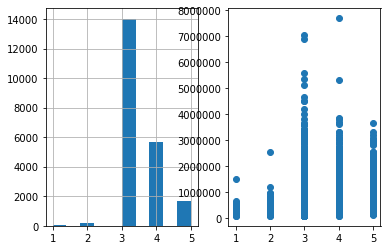

In [33]:
check_column(kc, 'condition')

### Grade

**Initial inspection shows correlation** there are some outliers ...

In [50]:
kc['grade'].describe()

count    21082.000000
mean         7.657717
std          1.173690
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [51]:
kc['grade'].value_counts()

7     8762
8     5922
9     2546
6     1991
10    1108
11     389
5      235
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [52]:
cat_grade = kc['grade'].astype('category')
coded_grade = cat_grade.cat.codes
kc['grade'] = coded_grade

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean         7.658
std          1.173
min          3.000
25%          7.000
50%          7.000
75%          8.000
max         13.000
Name: grade, dtype: float64


Value Counts:


7     0.415521
8     0.280826
9     0.121082
6     0.094365
10    0.052507
11    0.018475
5     0.011205
12    0.004121
4     0.001250
13    0.000602
3     0.000046
Name: grade, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD9933FA90>,
       dtype=object))

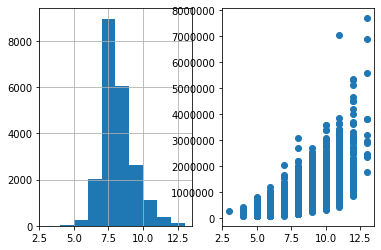

In [34]:
check_column(kc, 'grade')


In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

from statsmodels.formula.api import ols

In [ ]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['crim', 'dis', 'rm', 'zn', 'age']):
    print ("Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'medv~' + val
#   
    model = smf.ols(formula=f, data=data).fit()
    
    X_new = pd.DataFrame({val: [data[val].min(), data[val].max()]});
    preds = model.predict(X_new)
    data.plot(kind='scatter', x=val, y='medv');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")


In [ ]:
kc.head()

### Zip Codes

correlation but not linear...  would need to look group first... 
**how do I do that?** how could I graph this? 'kc.groupby('zipcode')['price'].mean()'

In [35]:
kc['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [36]:
#there are 70 zip codes, are these categorical values? looking at histogram for more information
#on how to categorize zip codes
kc['zipcode'].describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [37]:
import plotly.graph_objects as go

In [38]:
import plotly.express as px

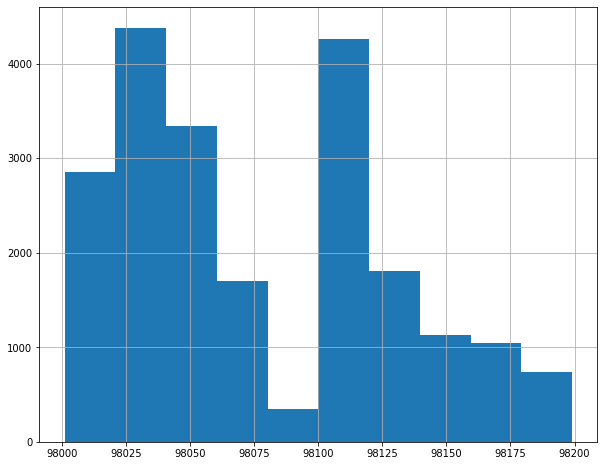

In [39]:
kc['zipcode'].hist(figsize=(10,8))

In [ ]:
##upon inspection, one idea is that zip codes appear to have some sort of 
#continuous values that could be binned into 10 ?

In [ ]:
#int_zipcode = kc['zipcode'].astype('str').astype('int')

In [ ]:
#bins = [98000, 98020, 98040, 98060, 98080, 98100, 98120, 98140, 98160, 98177, 98200]

In [ ]:
#bins_zip = pd.cut(kc['zipcode'].astype('str').astype('float'), bins)
#bins_zip = bins_zip.cat.as_ordered()
#bins_zip.head()

In [ ]:
#bins_zip.value_counts().plot(kind='bar', figsize=(11,8))

In [ ]:
#kc['zip_bins'] = bins_zip

In [ ]:
#cat_zip_bins1 = kc['zip_bins'].astype('category')
#coded_zip_bins1 = cat_zip_bins1.cat.codes
#kc['zip_bins'] = coded_zip_bins1

Creating a categorical codes for zip to compare to evaluate the difference with 70 different categories.

In [ ]:
display(kc.head())

In [41]:
cat_zip = kc['zipcode'].astype('category')
coded_zip = cat_zip.cat.codes
kc['zip_cats'] = coded_zip

DataType:
	 int8
Null Values Present = 0


count    21597.000
mean        35.150
std         19.249
min          0.000
25%         21.000
50%         34.000
75%         52.000
max         69.000
Name: zip_cats, dtype: float64


Value Counts:


42    0.027874
23    0.027272
49    0.026994
28    0.026578
51    0.025605
        ...   
41    0.004815
8     0.004630
14    0.003704
61    0.002639
24    0.002315
Name: zip_cats, Length: 70, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD9AC10AC8>,
       dtype=object))

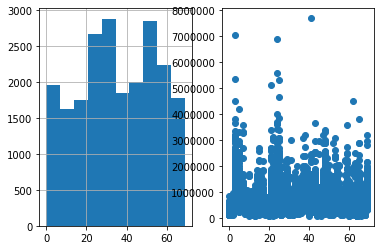

In [42]:
check_column(kc, 'zip_cats')

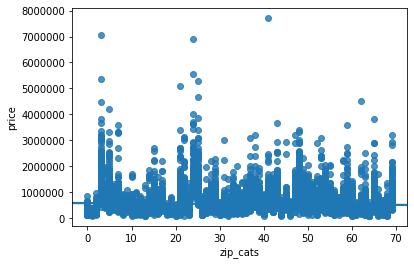

In [52]:
sns.regplot(kc['zip_cats'], kc['price'])

In [63]:
kc.groupby('zipcode')['price'].mean()

zipcode
98001    2.811949e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.356524e+06
98005    8.102897e+05
             ...     
98177    6.764194e+05
98178    3.106128e+05
98188    2.890783e+05
98198    3.028967e+05
98199    7.921879e+05
Name: price, Length: 70, dtype: float64

### or I could handle it with lat/long

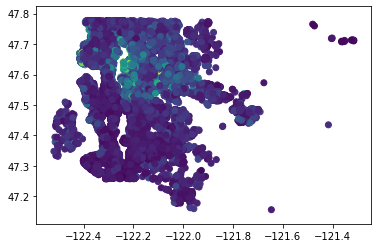

In [122]:
plt.scatter(x=kc_filtered['long'], y=kc_filtered['lat'], c=kc_filtered['price'])
plt.show()

### Another Look:

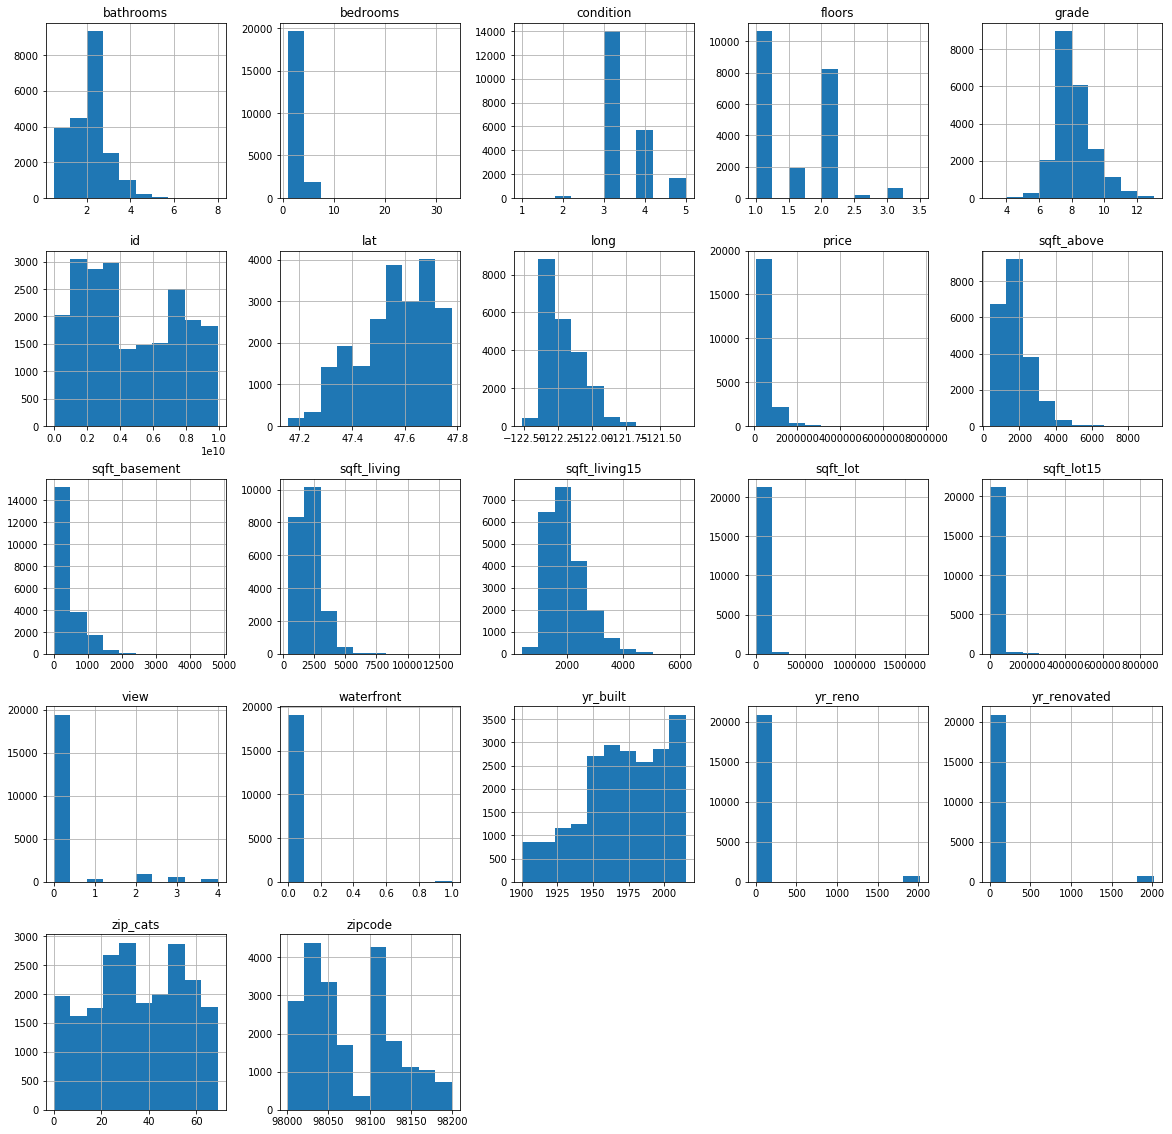

In [66]:
kc.hist(figsize=(20,20));


### Sqft Living

correlation, removed outliers kc_filtered is new df

DataType:
	 int64
Null Values Present = 0


count    21597.000
mean      2080.322
std        918.106
min        370.000
25%       1430.000
50%       1910.000
75%       2550.000
max      13540.000
Name: sqft_living, dtype: float64


Value Counts:


1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
          ...   
4970    0.000046
2905    0.000046
2793    0.000046
4810    0.000046
1975    0.000046
Name: sqft_living, Length: 1034, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD9DFD50F0>,
       dtype=object))

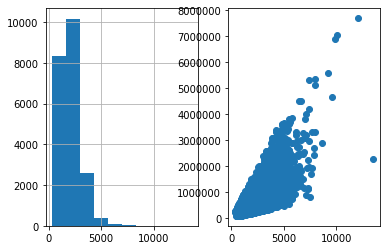

In [71]:
check_column(kc, 'sqft_living')

In [85]:
kc.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno,zip_cats
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,66
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991,55
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,16
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,58
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,37
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0,29


In [ ]:
Removing outliers: 

In [77]:
import scipy.stats as stats
z_score = np.abs(stats.zscore(kc['sqft_living']))


In [82]:
above_three = []

for index, value in enumerate(z_score):
    if value > 3:
        above_three.append(index)

In [84]:
above_three

[5,
 153,
 269,
 270,
 419,
 436,
 484,
 486,
 527,
 540,
 577,
 779,
 814,
 1054,
 1099,
 1162,
 1292,
 1313,
 1394,
 1446,
 1537,
 1620,
 1805,
 1846,
 1919,
 2038,
 2083,
 2086,
 2123,
 2234,
 2265,
 2381,
 2397,
 2442,
 2459,
 2576,
 2618,
 2624,
 2666,
 2711,
 2856,
 2862,
 2897,
 2972,
 3018,
 3098,
 3118,
 3201,
 3228,
 3335,
 3381,
 3515,
 3704,
 3717,
 3809,
 3867,
 3910,
 3950,
 4020,
 4028,
 4145,
 4186,
 4407,
 4577,
 4692,
 4807,
 4962,
 5024,
 5044,
 5054,
 5058,
 5444,
 5446,
 5697,
 5874,
 5961,
 6035,
 6189,
 6227,
 6384,
 6386,
 6495,
 6502,
 6622,
 6946,
 6978,
 7028,
 7120,
 7184,
 7245,
 7273,
 7339,
 7538,
 7674,
 7900,
 7982,
 8085,
 8184,
 8188,
 8337,
 8355,
 8436,
 8629,
 9067,
 9244,
 9245,
 9265,
 9313,
 9324,
 9366,
 9450,
 9503,
 9510,
 9544,
 9594,
 9705,
 9830,
 9943,
 10074,
 10272,
 10362,
 10374,
 10514,
 10805,
 10901,
 10939,
 10968,
 11093,
 11213,
 11245,
 11560,
 11661,
 11673,
 11736,
 11741,
 11817,
 11859,
 11871,
 12005,
 12271,
 12353,
 1235

In [86]:
kc_filtered = kc.drop(above_three)

DataType:
	 int64
Null Values Present = 0


count    21349.000
mean      2036.837
std        820.675
min        370.000
25%       1420.000
50%       1900.000
75%       2520.000
max       4830.000
Name: sqft_living, dtype: float64


Value Counts:


1300    0.006464
1400    0.006323
1440    0.006230
1660    0.006042
1010    0.006042
          ...   
2665    0.000047
4810    0.000047
2793    0.000047
2905    0.000047
2007    0.000047
Name: sqft_living, Length: 874, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD9DD0EA58>,
       dtype=object))

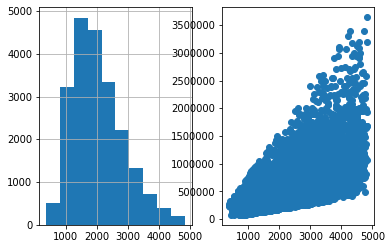

In [91]:
check_column(kc_filtered, 'sqft_living')

### Sqft_above

correlated with price, skewed

DataType:
	 int64
Null Values Present = 0


count    21349.000
mean      1755.367
std        762.724
min        370.000
25%       1190.000
50%       1550.000
75%       2180.000
max       4830.000
Name: sqft_above, dtype: float64


Value Counts:


1300    0.009930
1010    0.009837
1200    0.009649
1220    0.008993
1140    0.008619
          ...   
2793    0.000047
2905    0.000047
3001    0.000047
3065    0.000047
2007    0.000047
Name: sqft_above, Length: 850, dtype: float64

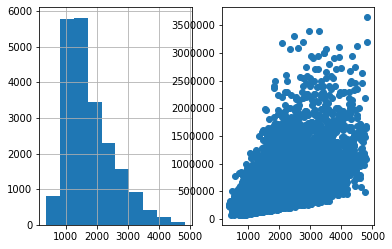

In [92]:

#looking at 
check_column(kc_filtered,'sqft_above');



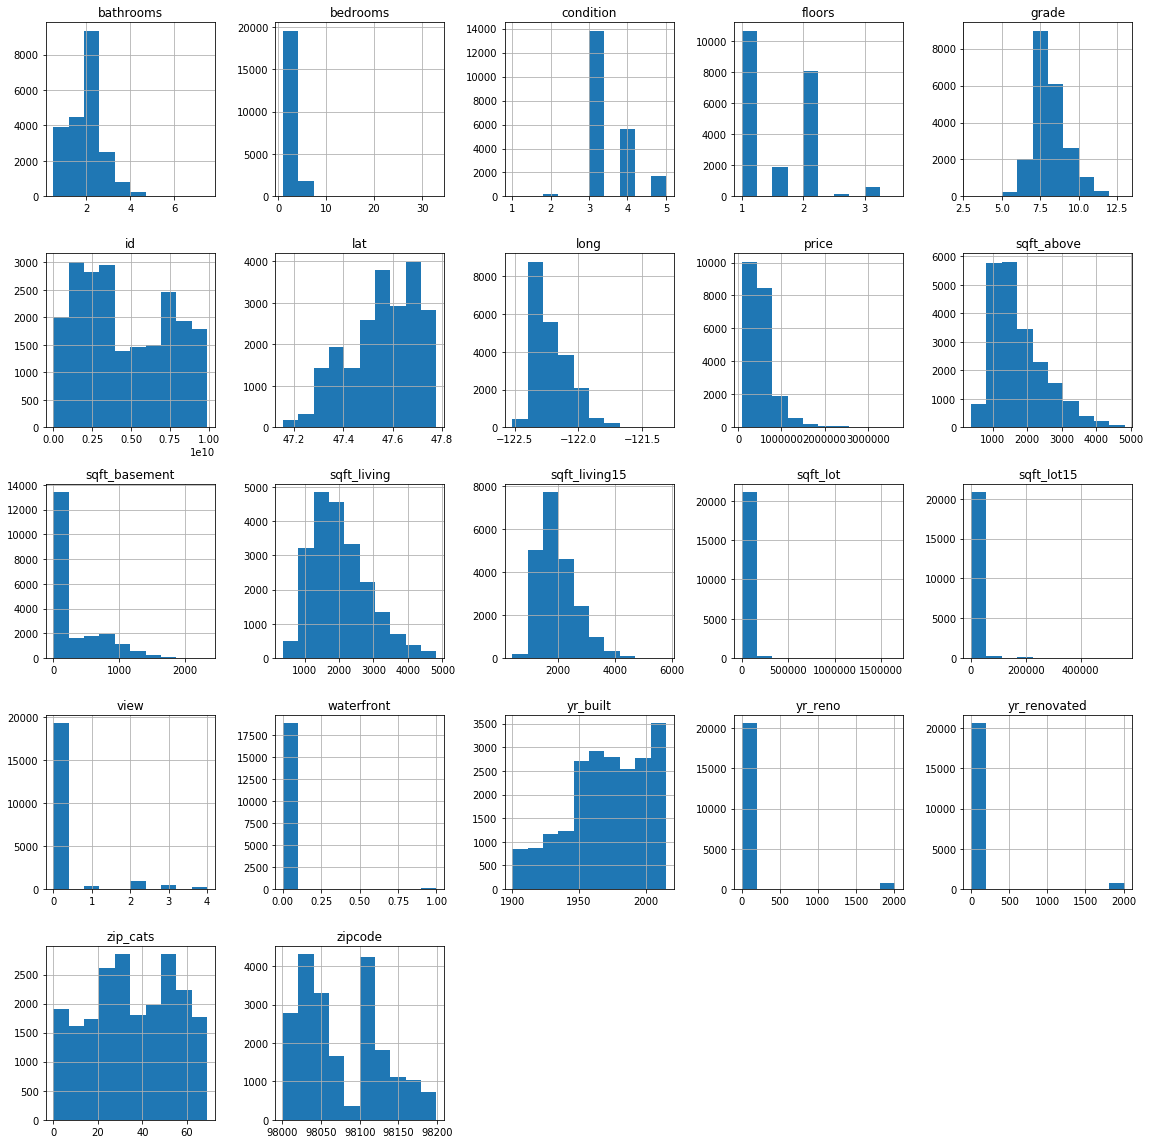

In [98]:
kc_filtered.hist(figsize=(16,16));
plt.tight_layout()

In [101]:
kc_filtered.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno,zip_cats
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,66
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991,55
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,16
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,58
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,37


### sqft_living15

skewed, correlation with price - mean- 1966, min 399, max 5790

DataType:
	 int64
Null Values Present = 0


count    21349.000
mean      1966.776
std        656.618
min        399.000
25%       1480.000
50%       1830.000
75%       2340.000
max       5790.000
Name: sqft_living15, dtype: float64


Value Counts:


1540    0.009228
1440    0.009134
1560    0.008993
1500    0.008431
1460    0.007916
          ...   
2873    0.000047
952     0.000047
3193    0.000047
1304    0.000047
2049    0.000047
Name: sqft_living15, Length: 750, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD9EB559B0>,
       dtype=object))

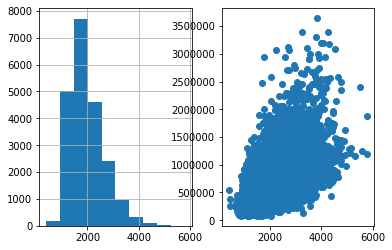

In [110]:
check_column(kc_filtered, 'sqft_living15')

in looking at price, mean home value is $540 k with std of $367 k - 154 homes were between $2-3 M, 5 between $4-$5 M

## Multicollinearity

Categorical Inspection:

In [ ]:
cols_to_plot = ['floors', 'view', 'condition', 'grade', 'zipcode']

fig, axes = plt.subplots(nrows=1,ncols=5)

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(x=kc[col], y=kc['price'])

In [ ]:
cols_to_plot ['floors', 'view', 'condition', 'grade', ]

fig, axes = plt.subplots(nrows=2,ncols=5)

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(x=kc[col], y=kc['price'])

Looking for things that may correlate and might not add anything to the model 

Thoughts:
    
    1) Are zip and long/lat redundant?
    2) 
    
    2) Looking for high correlations before transforming/modifying the data or making decisions

In [ ]:
corr = kc.corr().round(3)
corr

In [ ]:
#checking visually:
def multiplot(corr, figsize=(16,16)):
    fig, ax = plt.subplots(figsize=figsize)
    
    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True
    
    sns.heatmap(np.abs(corr),square=True, mask=mask, annot=True, cmap='Reds', ax=ax)
    return fig, ax

In [ ]:
multiplot(np.abs(kc.corr().round(3)))

#### notes :

zip_code needs to be edited out from model when evaluating 



Highly correlated variables:
    - Grade
    - sft_above
    - sft_living15 is on the fence...maybe normalize that one before dropping? it's slightly correlated with price and highly correlated with sqft
      
long lat have low correlations... even with price... dropping 


In [ ]:
drop_cols = ['grade','sqft_above']
kc.drop(drop_cols,axis=1,inplace=True)

In [ ]:
multiplot(np.abs(kc.corr().round(3)), figsize=(20,20))

In [ ]:
kc.hist();

### Bedrooms

In [ ]:
check_column(kc,'bedrooms')
from scipy import stats
z_score = np.abs(stats.zscore(kc['bedrooms']))
threshold = 3
print(np.where(z_score > 3))
sns.boxplot(x=kc['bedrooms'])



**Removing outliers based on z-scores**

In [ ]:
kc_filter = kc.drop([541,  1106,  1210,  1621,  3641,  3940,  3951,  3982,  4011,
        4145,  4659,  4762,  5934,  6026,  6856,  7021,  7922,  8311,
        8341,  8420,  8544,  8857,  8908,  9219,  9422,  9494, 10020,
       10519, 10687, 11719, 12292, 12295, 12449, 12460, 12565, 12797,
       12986, 13682, 13849, 14650, 14698, 14785, 14864, 15133, 15274,
       15353, 15467, 15897, 16313, 16420, 16805, 16902, 17991, 18007,
       18024, 18360, 18509, 18779, 18827, 18852])

In [ ]:
kc_filter.head()

In [ ]:

check_column(kc_filter,'bedrooms')
z_score = np.abs(stats.zscore(kc_filter['bedrooms']))
threshold = 3
print(np.where(z_score > 3))
sns.boxplot(x=kc_filter['bedrooms'])


### Bathrooms

In [ ]:
check_column(kc, 'bathrooms')
ax = sns.boxplot(x=kc['bathrooms'])

In [ ]:
plt.scatter(x=kc['bathrooms'], y=kc['price'])

In [ ]:
kc.head()

### sqft_living

## Normalizing

In [ ]:
kc.hist();

In [ ]:
log_cols = ['']

for col in log_cols:
    kc[col+ '_log'] = np.log(kc[col])

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['these are ones that need to be scaled']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(kc[num_cols])

## Dropping

In [ ]:
#drop_cols = ['col1','col2']
#kc.drop(drop_cols,axis=1)


# Model

In [ ]:
kc.hist();

In [ ]:
# Importing necessary tools
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [ ]:
#building calling the appropriate columns to build model with:
cols = kc.drop(['last_upgrade', 'price', 'date', 'zipcode'], axis=1).columns
str_cols = '  + '.join(cols)
str_cols

In [ ]:
#build formula
formula = 'price~' + str_cols
formula

In [ ]:
#modeling
model = smf.ols(formula=formula, data=kc).fit()
model.summary()

## Fit Testing: QQ Plot and Scatter

In [ ]:
resids = model.resid
import scipy.stats as stats

sm.graphics.qqplot(resids, stats.norm, line = '45')

In [ ]:
def scatter_mean(df, col_name):
   """Plot a scatter . plot """
   ax = model.summary(kind='scatter', x=x, y=y, figsize=figsize)

In [ ]:
scatter_mean(kc, x=kc['zip_cats'], y=kc['price'])

## Validation

In [ ]:
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()

#x = kc.drop('price', axis=1).values
#y = kc('price').values

#kc_10_results = np.mean(cross_val_score(linreg, x, y, cv=10, scoring='r2'))

# Interpretation

# Conclusions and Recommendations: